## Cilia quantification
The purpose of this notebook is to implement scikit image regionprops to populate a table with the characteristics of each segmented cilia.

In [3]:
from morphocilia.io import load_rescaled_channel
from morphocilia.segmenter import cilia_segmenter_cleaner
import napari
import numpy as np
import pandas as pd
from skimage.exposure import rescale_intensity
from skimage.io import imread
from skimage.measure import regionprops_table
import seaborn as sns

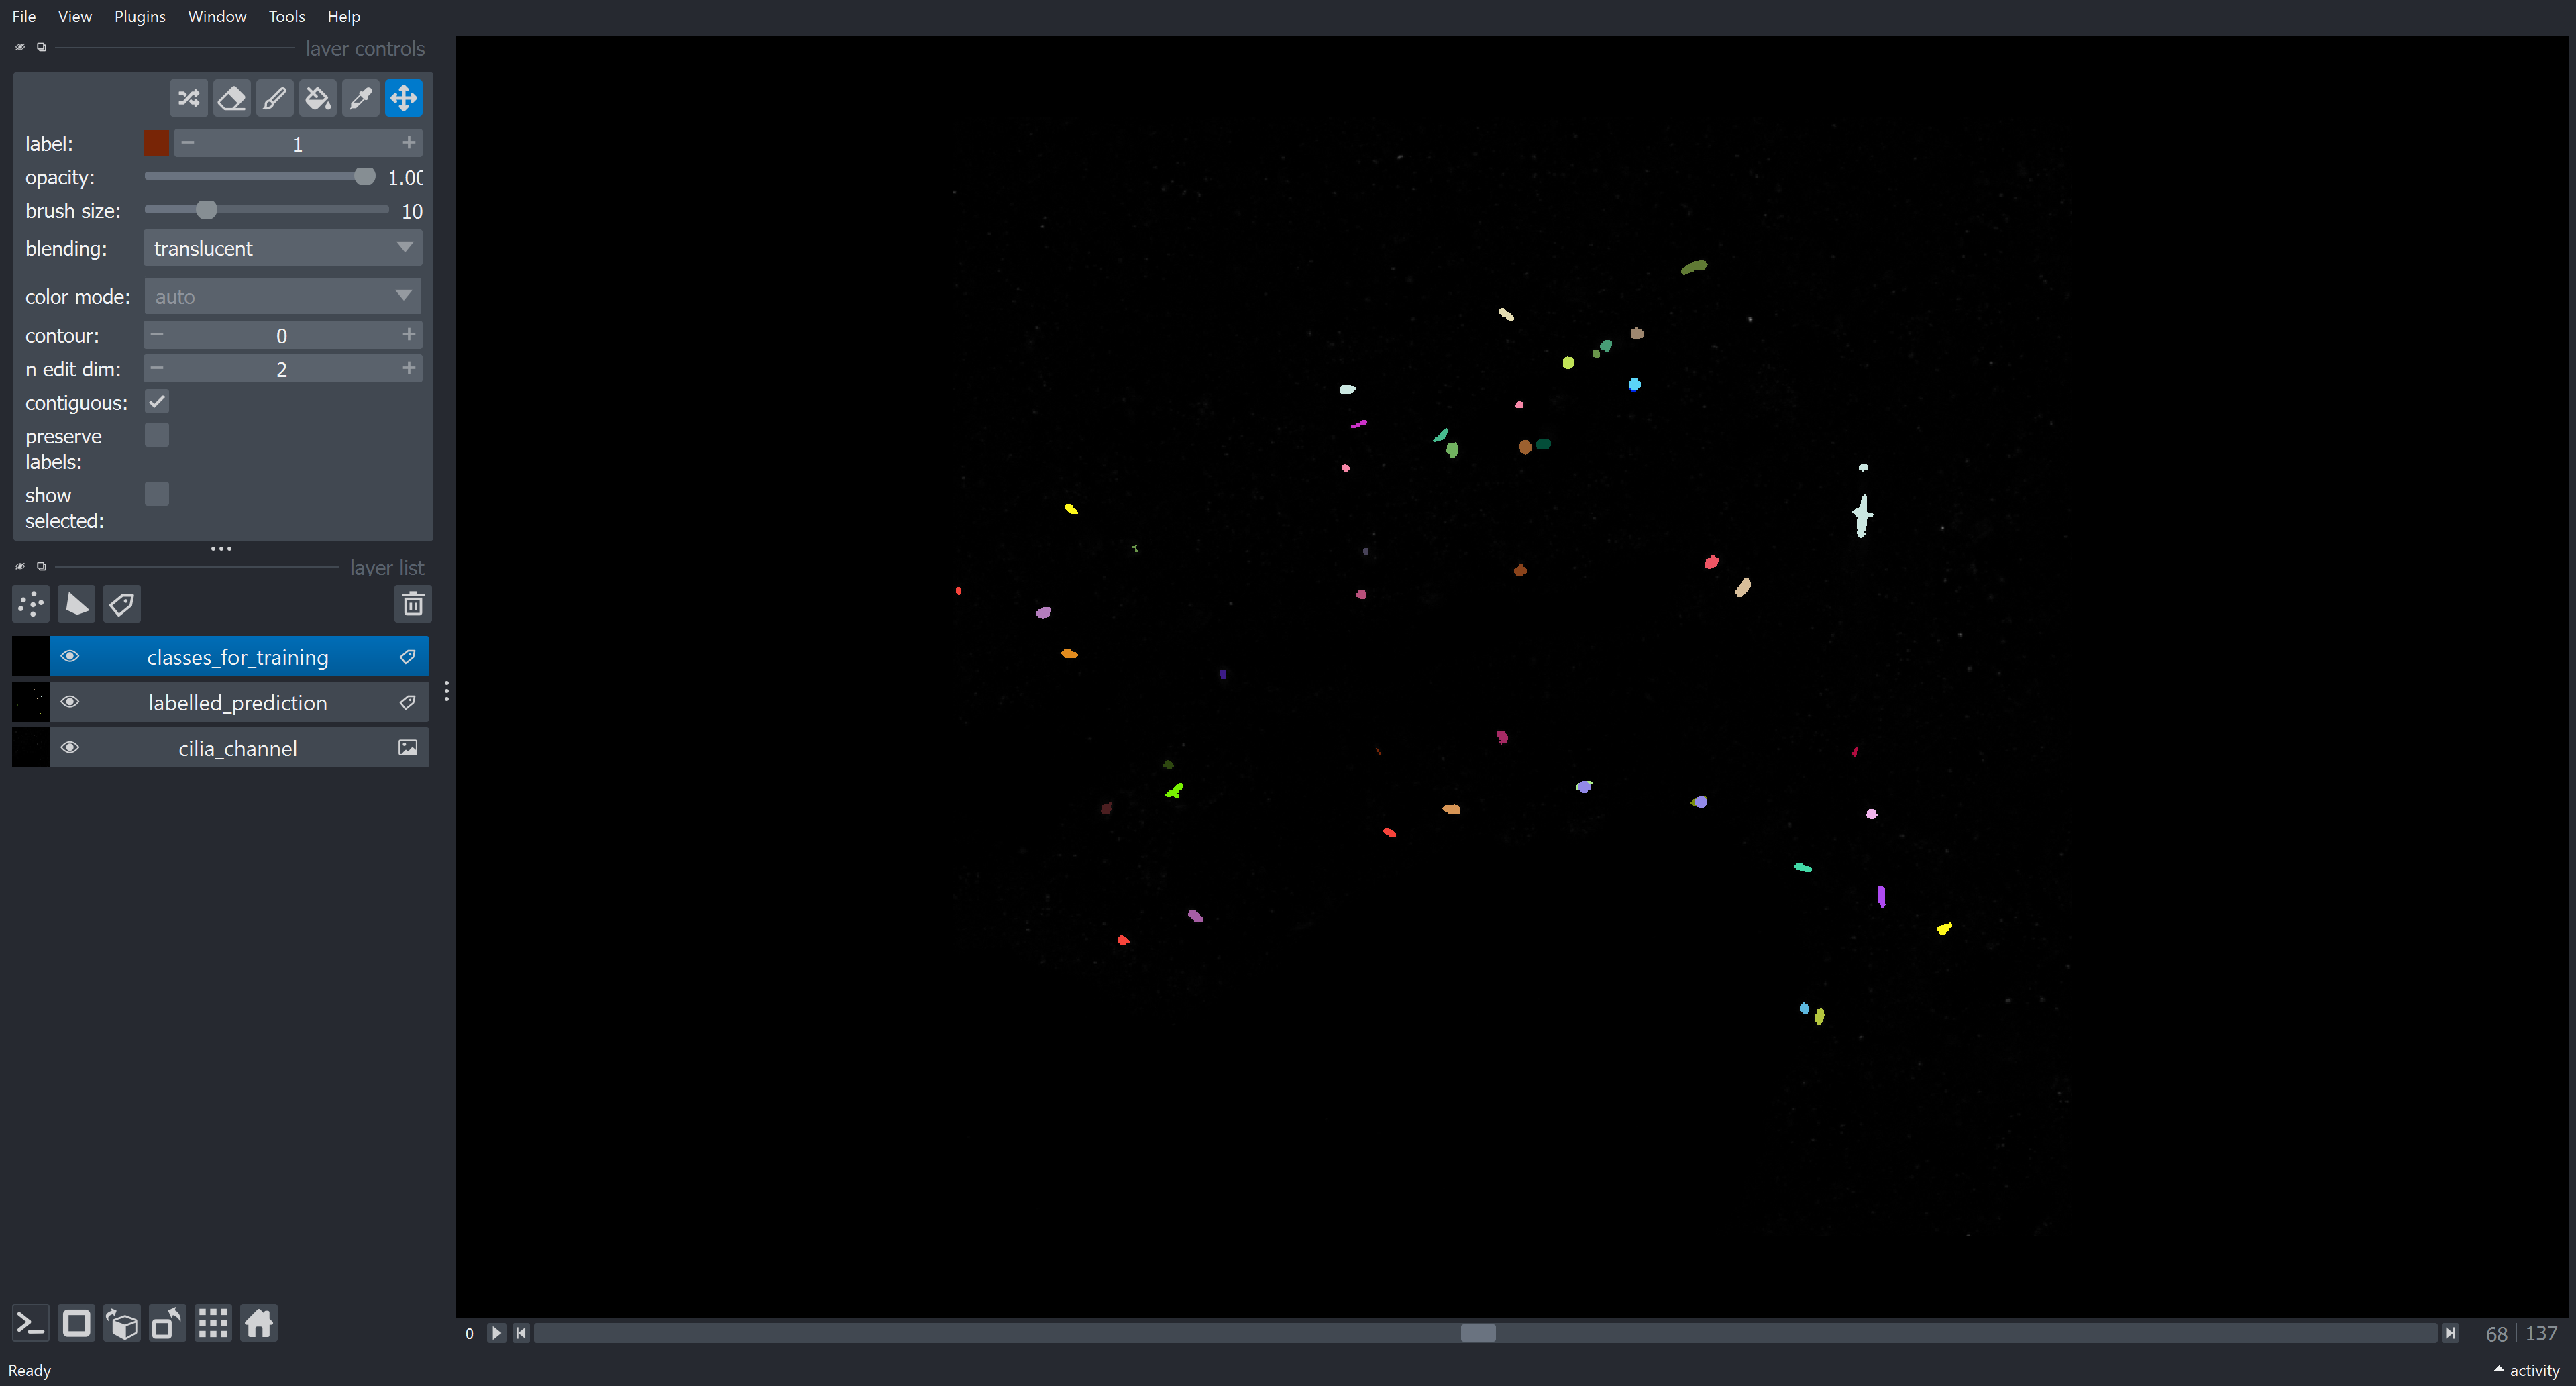

In [2]:
cilia_channel = load_rescaled_channel(
    "../data/20231025_p1_cd13_opn_arl13b.lif", 5, 1
)
classes_for_training = imread("D:/estela/src/classes_for_training.tif")

labelled_prediction = cilia_segmenter_cleaner(cilia_channel)

viewer = napari.Viewer()
viewer.add_image(cilia_channel)
viewer.add_labels(labelled_prediction, opacity=1)
viewer.add_labels(classes_for_training, opacity=1)
napari.utils.nbscreenshot(viewer)

In [11]:
def intensity_median(mask, intensity_image):
    return np.median(intensity_image[mask])

In [15]:
props = regionprops_table(
    labelled_prediction,
    cilia_channel.compute(),
    properties=[
        "label",
        "area",
        "axis_major_length",
        "axis_minor_length",
        "intensity_max",
        "solidity",
    ],
    extra_properties=[intensity_median],
)
data = pd.DataFrame(props)
data

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,intensity_median
0,1,719.0,18.294934,8.525367,174.0,0.896509,12.0
1,2,834.0,21.121715,8.043381,126.0,0.875131,12.0
2,3,749.0,17.807669,8.183166,133.0,0.858945,11.0
3,4,584.0,22.366502,6.900171,125.0,0.732748,12.0
4,5,457.0,20.177920,4.147177,67.0,0.887379,11.0
...,...,...,...,...,...,...,...
415,416,941.0,21.670160,8.111516,105.0,0.888574,14.0
416,417,500.0,14.569206,7.973495,146.0,0.904159,13.0
417,418,728.0,19.896112,7.929379,190.0,0.864608,13.0
418,419,937.0,21.872716,8.837211,171.0,0.893232,16.0


In [16]:
def parse_classes(class_number):
    if class_number == 1:
        return "elongated"
    elif class_number == 2:
        return "looped"
    elif class_number == 3:
        return "fibroblastic"
    elif class_number == 0:
        return "NA"
    else:
        raise ValueError

In [17]:
props = regionprops_table(
    labelled_prediction,
    classes_for_training,
    properties=["label", "intensity_max"],
)
data_classes = pd.DataFrame(props).rename(columns={"intensity_max": "classes"})
data_classes["classes"] = data_classes["classes"].apply(parse_classes)
data_classes

,label,classes
0,1,NA
1,2,NA
2,3,NA
3,4,NA
4,5,NA
...,...,...
415,416,NA
416,417,NA
417,418,NA
418,419,NA


In [18]:
complete_dataset = data.merge(right=data_classes, on="label")
complete_dataset

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,intensity_median,classes
0,1,719.0,18.294934,8.525367,174.0,0.896509,12.0,NA
1,2,834.0,21.121715,8.043381,126.0,0.875131,12.0,NA
2,3,749.0,17.807669,8.183166,133.0,0.858945,11.0,NA
3,4,584.0,22.366502,6.900171,125.0,0.732748,12.0,NA
4,5,457.0,20.177920,4.147177,67.0,0.887379,11.0,NA
...,...,...,...,...,...,...,...,...
415,416,941.0,21.670160,8.111516,105.0,0.888574,14.0,NA
416,417,500.0,14.569206,7.973495,146.0,0.904159,13.0,NA
417,418,728.0,19.896112,7.929379,190.0,0.864608,13.0,NA
418,419,937.0,21.872716,8.837211,171.0,0.893232,16.0,NA


c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

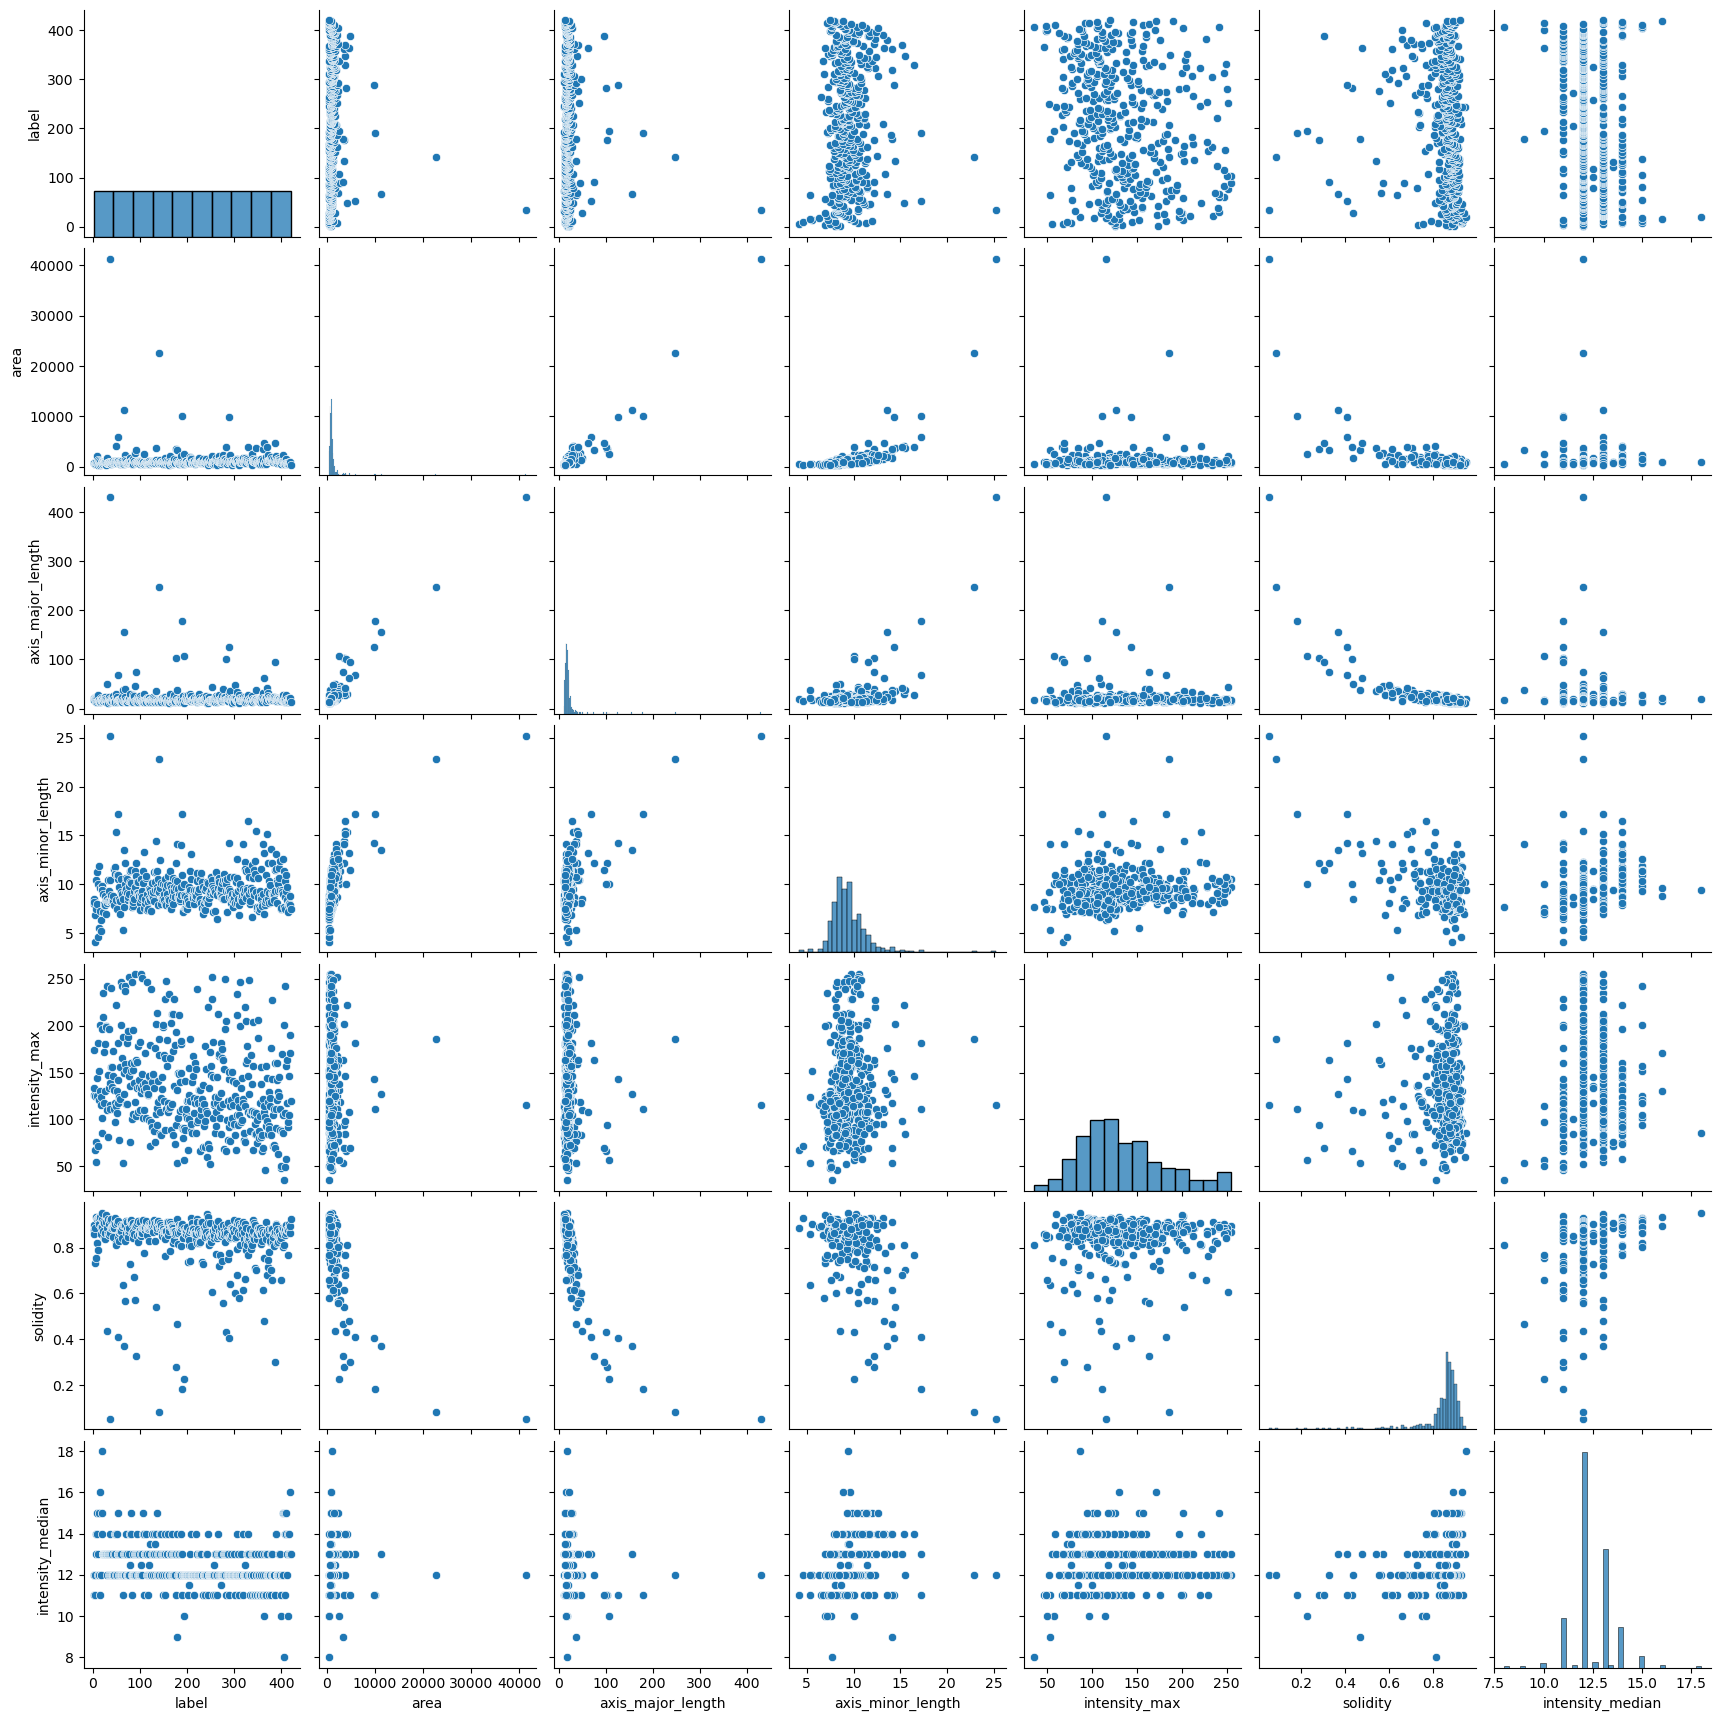

In [19]:
sns.pairplot(data)

c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

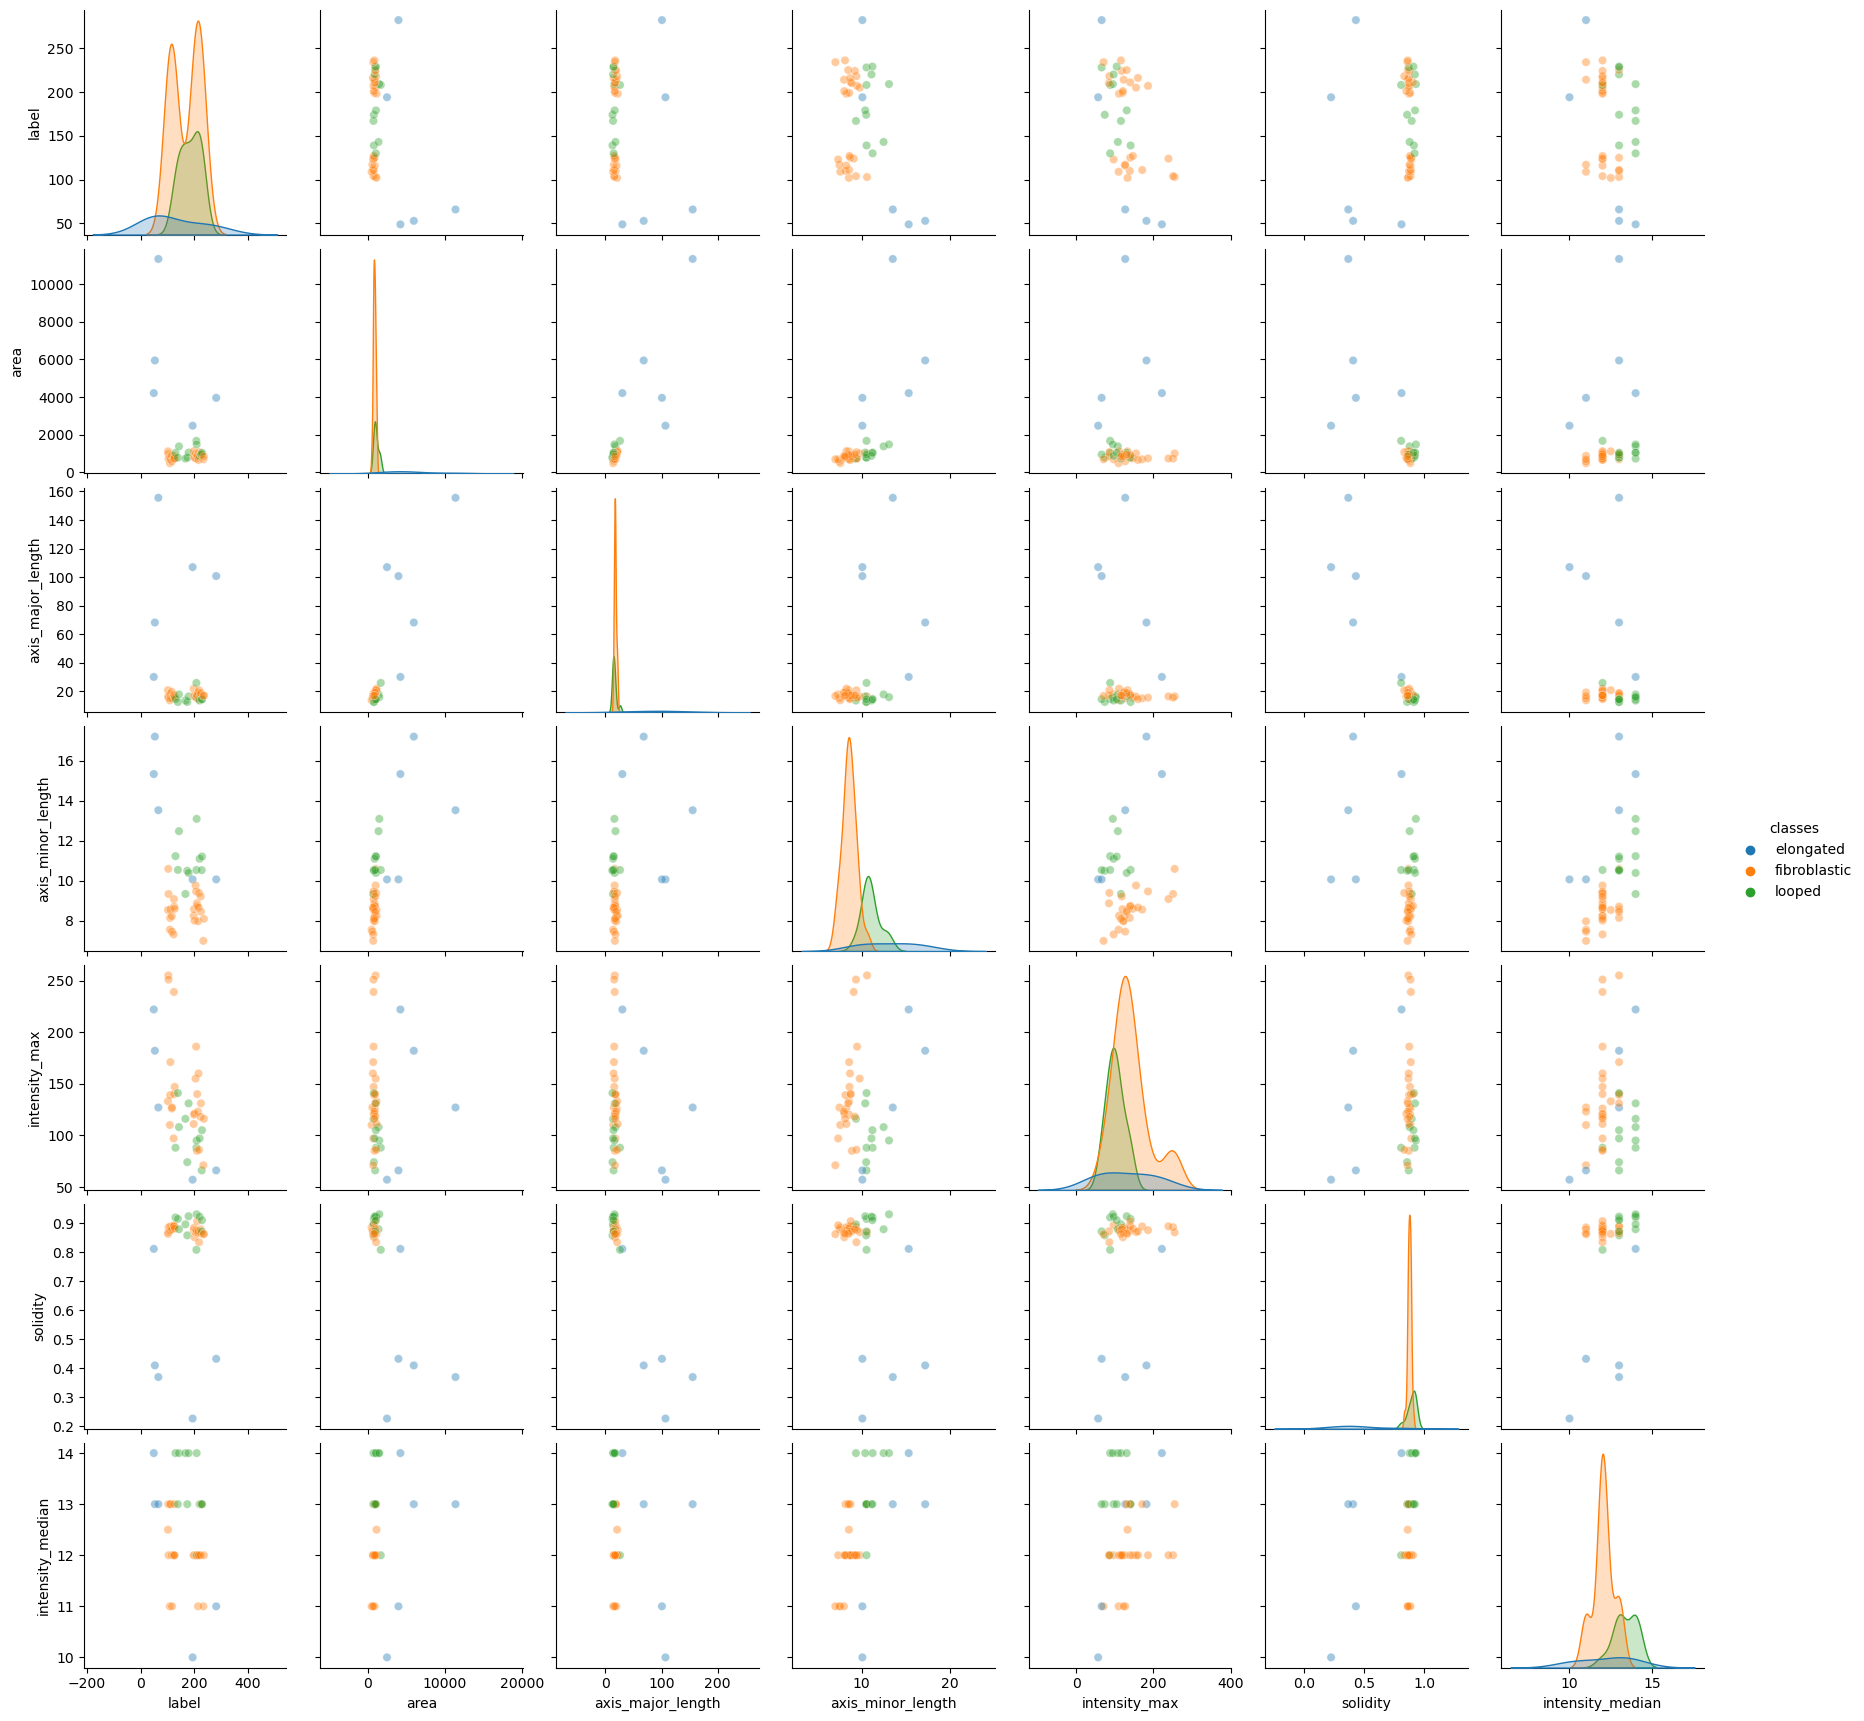

In [20]:
sns.pairplot(
    complete_dataset.query("classes != 'NA'").query("area < 25000"),
    hue="classes",
    plot_kws={"alpha": 0.4},
)

In [21]:
complete_dataset.to_csv("cilia_quantification.csv", index=False)

# Tests

In [ ]:
complete_dataset.query("axis_major_length > 60")

In [ ]:
complete_dataset.loc[complete_dataset["area"].argmax()]